In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("Linear Regression.xlsx", sheet_name=0)

In [3]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [4]:
data.shape

(21613, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [6]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


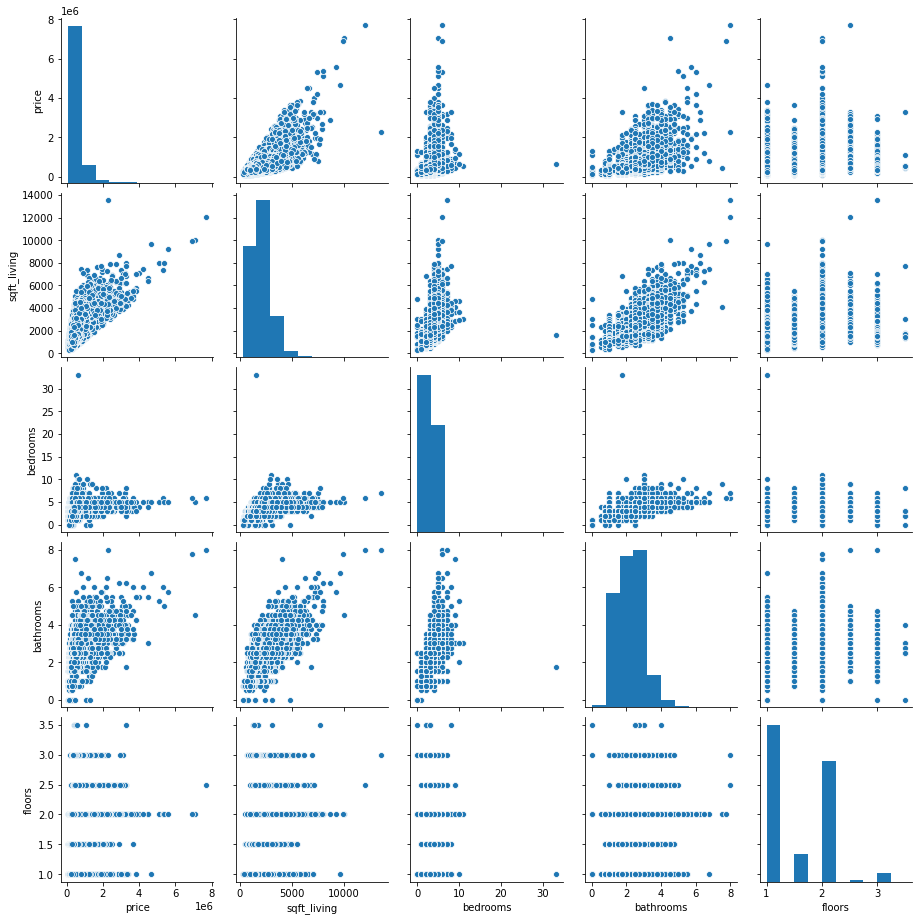

In [7]:
sns.pairplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D83769970>,
      dtype=object)

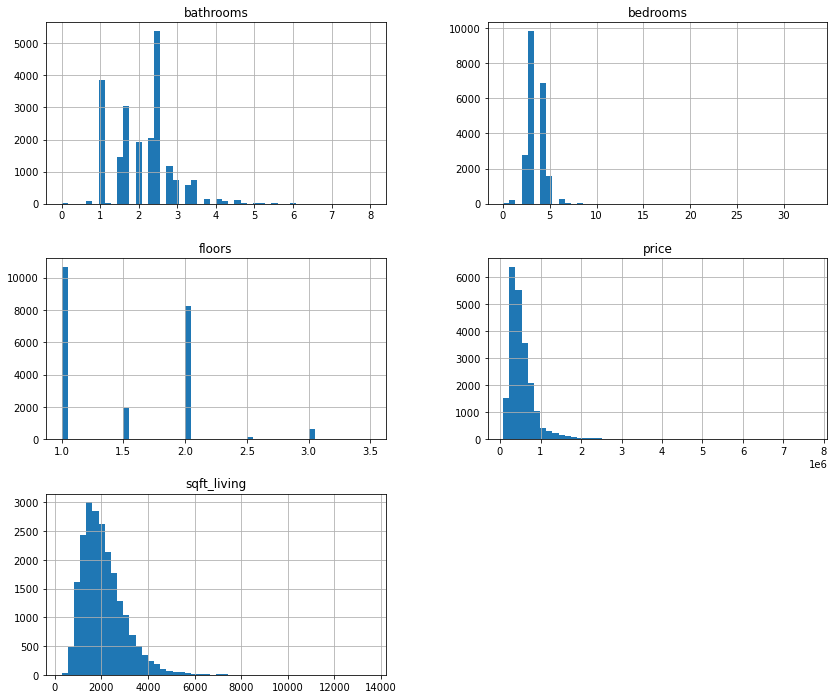

In [8]:
data.hist(figsize=(14,12), bins=50)

In [9]:
data.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [10]:
data.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


In [11]:
x = data.drop(['price'], axis=1)
y = data.iloc[:,:1]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0,test_size=0.25)

In [14]:
train_x.shape, train_y.shape

((16209, 4), (16209, 1))

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

lr.fit(train_x, train_y)

LinearRegression()

In [17]:
ypred = lr.predict(test_x)

In [18]:
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

print(f"R-Square score is {r2_score(test_y, ypred)}")
print(f"RMSE is {np.sqrt(mean_squared_error(test_y, ypred))}")

R-Square score is 0.5003085644927433
RMSE is 257641.80978974784


In [19]:
print(f"R-Square score is {r2_score(train_y, lr.predict(train_x))}")

R-Square score is 0.5088987138124773


In [20]:
import statsmodels.api as sm

lm = sm.OLS(train_y, train_x)
lm1 = lm.fit()

In [21]:
x.head()

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0


In [22]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.844
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                          2.197e+04
Date:                Fri, 07 Aug 2020   Prob (F-statistic):                        0.00
Time:                        22:55:57   Log-Likelihood:                     -2.2500e+05
No. Observations:               16209   AIC:                                  4.500e+05
Df Residuals:                   16205   BIC:                                  4.500e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   307.0220      3.511     87.448      0.000     300.140     313.904
bedrooms    -4.059e+04   2072.754    -19.583      0.000   -4.47e+04   -3.65e+04
bathrooms    4491.1002   4387.460      1.024      0.306   -4108.805    1.31e+04
floors       1.752e+04   3904.181      4.488      0.000    9869.010    2.52e+04
==============================================================================
Omnibus:                    10393.497   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           335133.798
Skew:                           2.588   Prob(JB):                         0.00
Kurtosis:                      24.666   Cond. No.                     5.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""